<a href="https://colab.research.google.com/github/vihaannnn/AI-Allignment-Research/blob/master/Submissions/Week4/iModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**imodels interpretation notebook - by Vihaan Nama**

This project aims to implement 3 models - Hierarchical Shrinkage Decision Tree, RuleFit Classifier, and Optimal Rule List Classifier

Each model also has a generated diagram showing how the model is prodicting the outputs

The associated reports are added in github repo folder

Dataset being used is mushroom_cleaned.csv from kaggle (also included in the github repo)

Parts of the code and report were generated with the help of Perplexity AI

In [1]:
!pip install imodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.0/243.0 kB 8.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
from imodels import HSTreeClassifierCV
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.model_selection import train_test_split
from imodels import HSTreeClassifierCV, OptimalRuleListClassifier, RuleFitClassifier # import any imodels model here

# prepare data (a sample clinical dataset)
df = pd.read_csv('mushroom_cleaned.csv')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


In [6]:
df.dropna(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
# prompt: split df into X and y and perform train test split

X = df.drop('class', axis=1)
y = df['class']
feature_names = df.columns.tolist()[:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
print(X_train)
print(feature_names)

       cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
10135           242          6                0          10     1.276830   
5457            601          5                1          10     0.469946   
1411            887          2                0          10     1.997027   
2908            343          2                2           5     0.589316   
1895            625          0                2          10     2.534190   
...             ...        ...              ...         ...          ...   
11284           284          0                0           3     0.235186   
44732           973          6                4           6     1.328557   
38158            88          0                0           5     0.720623   
860            1276          2                0          10     2.343199   
15795           765          2                5          11     1.050027   

       stem-width  stem-color    season  
10135         238           6  0.888450  
545

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
print(y_train)

10135    1
5457     0
1411     1
2908     1
1895     1
        ..
11284    1
44732    1
38158    1
860      0
15795    0
Name: class, Length: 43228, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# fit the model
model = OptimalRuleListClassifier()  # initialize a tree model and specify only 4 leaf nodes
model.fit(X_train, y_train)   # fit model
preds = model.predict(X_test) # discrete predictions: shape is (n_test, 1)
preds_proba = model.predict_proba(X_test) # predicted probabilities: shape is (n_test, n_classes)
print(model) # print the model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/imodels/rule_list/corels_wrapper.py:87: UserWarning: Should install corels with pip install corels. Using GreedyRuleList instead.
  warnings.warn("Should install corels with pip install corels. Using GreedyRuleList instead.")


> ------------------------------
> Greedy Rule List
> ------------------------------
↓
44.55% risk (43228 pts)
	if ~stem-width ==> 69.0% risk (18460 pts)
↓
41.24% risk (24768 pts)
	if stem-height ==> 66.10000000000001% risk (3295 pts)
↓
38.76% risk (21473 pts)
	if stem-width ==> 76.0% risk (1430 pts)
↓
33.66% risk (20043 pts)
	if gill-attachment ==> 49.6% risk (6405 pts)
↓
22.53% risk (13638 pts)
	if ~stem-color ==> 46.9% risk (6236 pts)
↓
22.53% risk (7402 pts)



In [17]:
from sklearn.tree import plot_tree
# fit the model
model = RuleFitClassifier(tree_size = 4)  # initialize a tree model and specify only 4 leaf nodes
model.fit(X_train.values, y_train.values, feature_names=feature_names)   # fit model. Changed X_train to X_train.values and y_train to y_train.values
preds = model.predict(X_test.values) # discrete predictions: shape is (n_test, 1). Changed X_test to X_test.values
preds_proba = model.predict_proba(X_test.values) # predicted probabilities: shape is (n_test, n_classes). Changed X_test to X_test.values
print(model) # print the model


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


> ------------------------------
> RuleFit:
> 	Predictions are made by summing the coefficients of each rule
> ------------------------------
                                                                                                rule  coef
                                                                                   season <= 1.37373  0.45
                                                              cap-shape <= 5.5 and season <= 1.37373  0.20
           cap-shape > 1.5 and stem-height <= 1.6986 and stem-width <= 2779.5 and stem-width > 606.5 -0.12
                                                         stem-width <= 2480.0 and stem-width > 825.0 -0.03
                              stem-height <= 1.65881 and stem-width <= 2659.5 and stem-width > 717.0 -0.30
                                                           stem-width <= 677.5 and season <= 1.37373  0.01
                                                                               stem-height > 0.81811  0.01
  

In [18]:
rules_df = model.visualize()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


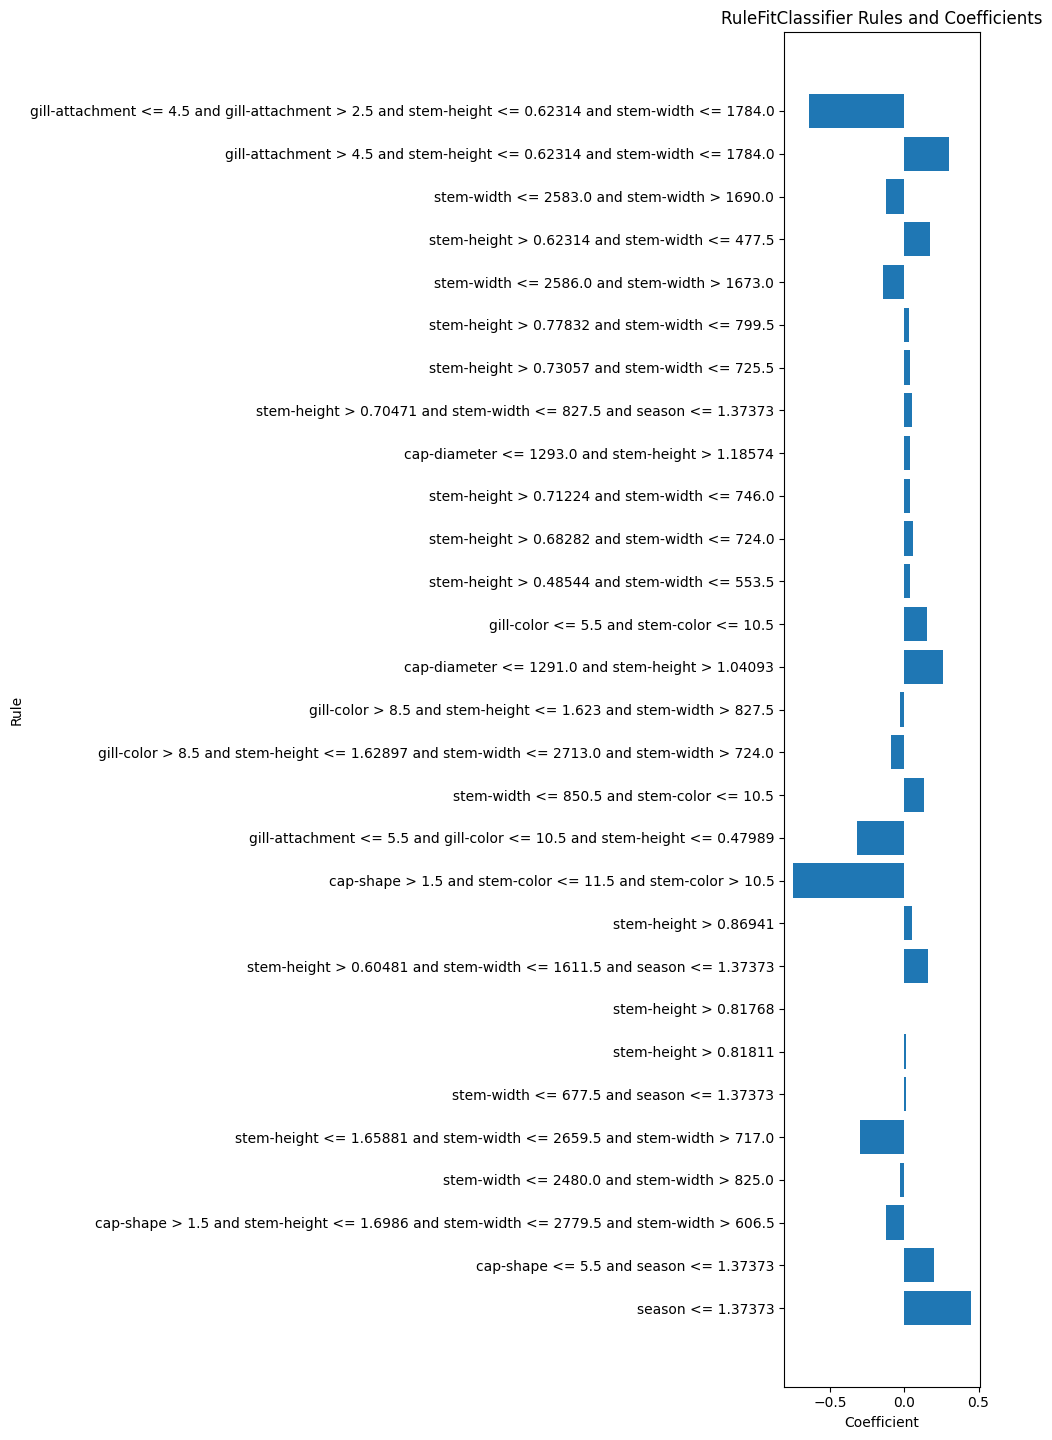

In [19]:
plt.figure(figsize=(10, len(rules_df) * 0.5))  # Adjust figure size as needed
plt.barh(rules_df['rule'], rules_df['coef'])
plt.xlabel('Coefficient')
plt.ylabel('Rule')
plt.title('RuleFitClassifier Rules and Coefficients')
plt.tight_layout()
plt.show()

In [16]:
# fit the model
model = HSTreeClassifierCV(max_leaf_nodes=4)  # initialize a tree model and specify only 4 leaf nodes
model.fit(X_train.values, y_train.values, feature_names=feature_names)   # fit model
preds = model.predict(X_test) # discrete predictions: shape is (n_test, 1)
preds_proba = model.predict_proba(X_test) # predicted probabilities: shape is (n_test, n_classes)
print(model) # print the model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pr

> ------------------------------
> Decision Tree with Hierarchical Shrinkage
> 	Prediction is made by looking at the value in the appropriate leaf of the tree
> ------------------------------
|--- stem-width <= 729.50
|   |--- stem-height <= 0.78
|   |   |--- weights: [0.41, 0.59] class: 1.0
|   |--- stem-height >  0.78
|   |   |--- weights: [0.15, 0.85] class: 1.0
|--- stem-width >  729.50
|   |--- stem-height <= 1.62
|   |   |--- weights: [0.59, 0.41] class: 0.0
|   |--- stem-height >  1.62
|   |   |--- weights: [0.34, 0.66] class: 1.0



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [26]:
from graphviz import Digraph

def create_tree_visualization(tree_string):
    dot = Digraph(comment='Decision Tree')
    dot.attr(rankdir='TB')  # Top to bottom layout

    lines = tree_string.strip().split('\n')
    node_id = 0
    parent_stack = []

    for line in lines:
        depth = line.count('|')
        content = line.strip('| -')

        if 'weights' in content:
            node_type = 'leaf'
        else:
            node_type = 'decision'

        node_id += 1
        node_label = content.replace('weights:', 'w:').replace('class:', 'c:')

        dot.node(str(node_id), node_label, shape='box' if node_type == 'leaf' else 'oval')

        if parent_stack and len(parent_stack) > depth - 1:
            parent_stack = parent_stack[:depth-1]

        if parent_stack:
            dot.edge(str(parent_stack[-1]), str(node_id),
                     label='Yes' if '<=' in content else 'No')

        if node_type == 'decision':
            parent_stack.append(node_id)

    return dot

# Your tree string
tree_string = """
|---root
|   |--- stem-width <= 729.50
|   |   |--- stem-height <= 0.78
|   |   |   |--- weights: [0.41, 0.59] class: 1.0
|   |   |--- stem-height >  0.78
|   |   |   |--- weights: [0.15, 0.85] class: 1.0
|   |--- stem-width >  729.50
|   |   |--- stem-height <= 1.62
|   |   |   |--- weights: [0.59, 0.41] class: 0.0
|   |   |--- stem-height >  1.62
|   |   |   |--- weights: [0.34, 0.66] class: 1.0
"""

# Create the visualization
tree_viz = create_tree_visualization(tree_string)

# Render the tree
tree_viz.render('decision_tree', format='png', cleanup=True)
print("Tree visualization saved as 'decision_tree.png'")

Tree visualization saved as 'decision_tree.png'


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


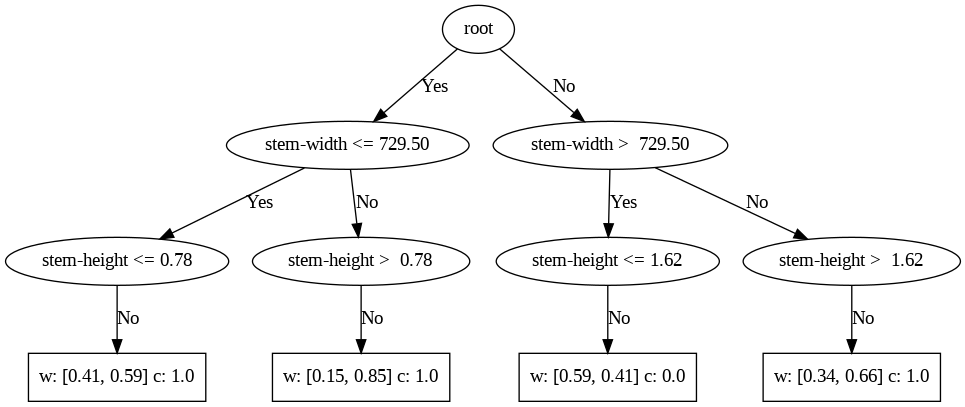

In [28]:
from IPython.display import display, Image
display(Image(tree_viz.pipe(format='png')))